In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import linprog
from joblib import Parallel, delayed
import os
import tempfile
from RiskMeasureEst import *
import random
from Env import Env
from Agent import *
from tqdm import tqdm
from Evaluate import *

In [2]:
gamma = 0.9
aph = 0.50
B = 5
p1 = 0.75
O = 1

In [3]:
p = np.zeros((B,2,B))

p[0,0,1] = p1
p[0,0,0] = 1-p1
p[0,1,1] = 1-p1
p[0,1,0] = p1

p[B-1,0,B-1] = p1
p[B-1,0,0] = 1-p1
p[B-1,1,B-1] = 1-p1
p[B-1,1,0] = p1

for i in range(1,B-1):
    p[i,0,i+1] = p1
    p[i,0,0] = 1-p1
    p[i,1,i+1] = 1-p1
    p[i,1,0] = p1

In [4]:
r = np.zeros((B,2,B))

r[0,0,0] = 2
r[0,1,0] = 2

r[B-1,0,B-1] = 10
r[B-1,1,B-1] = 10

for i in range(1,B):
    r[i,0,0] = 2
    r[i,1,0] = 2

In [5]:
adict = evaluate(p,r,B,'CVaR',nameslist = [['CVaR','Mean','1'],\
                         ['CVaR','Mean','2'],\
                         ['CVaR','Mean','3'],\
                         ['CVaR','CVaR','2']]
            )

Calculating Ground Truth


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:11<00:00,  2.46it/s]


In [6]:
adict.keys()

dict_keys(['rho_CVaR_beta_Mean_Prior_1', 'rho_CVaR_beta_Mean_Prior_2', 'rho_CVaR_beta_Mean_Prior_3', 'rho_CVaR_beta_CVaR_Prior_2'])

<AxesSubplot: >

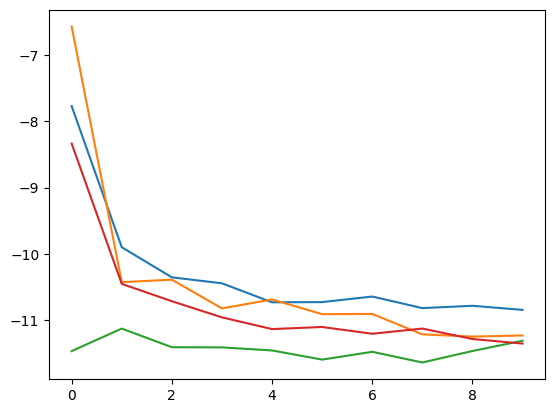

In [7]:
adict['rho_CVaR_beta_Mean_Prior_1'].mean(axis=1).plot()
adict['rho_CVaR_beta_Mean_Prior_2'].mean(axis=1).plot()
adict['rho_CVaR_beta_Mean_Prior_3'].mean(axis=1).plot()
adict['rho_CVaR_beta_CVaR_Prior_2'].mean(axis=1).plot()

In [8]:
adict = evaluate_robust_expectation(p,r,[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.60,\
               0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00],\
                            gamma,B,nameslist = [['Mean','Mean','2'],\
                         ['Mean','CVaR','2']],read_file=True
            )

In [9]:
adict.keys()

dict_keys(['rho_Mean_beta_Mean_Prior_2', 'rho_Mean_beta_CVaR_Prior_2'])

<AxesSubplot: >

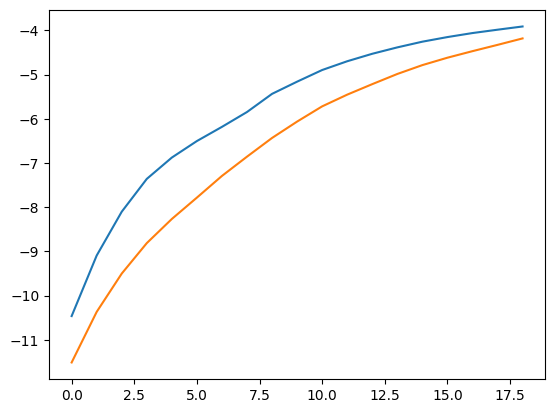

In [10]:
pd.Series(adict['rho_Mean_beta_Mean_Prior_2']).plot()
pd.Series(adict['rho_Mean_beta_CVaR_Prior_2']).plot()

In [11]:
adict = evaluate_robust_CVaR(p,r,[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10],\
                            gamma,B,nameslist = [['CVaR','Mean','2'],\
                         ['CVaR','CVaR','2']],read_file=True
            )

In [12]:
adict.keys()

dict_keys(['rho_CVaR_beta_Mean_Prior_2', 'rho_CVaR_beta_CVaR_Prior_2'])

<AxesSubplot: >

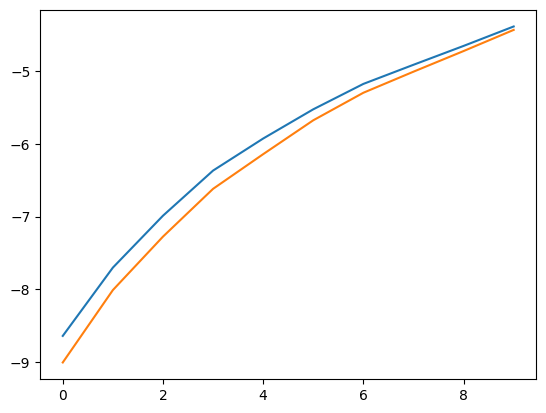

In [13]:
pd.Series(adict['rho_CVaR_beta_Mean_Prior_2']).plot()
pd.Series(adict['rho_CVaR_beta_CVaR_Prior_2']).plot()